# Linear regression using single variable

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'word2number'

In [ ]:
df=pd.read_csv('MLDatasets/canada_per_capita_income.csv')
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


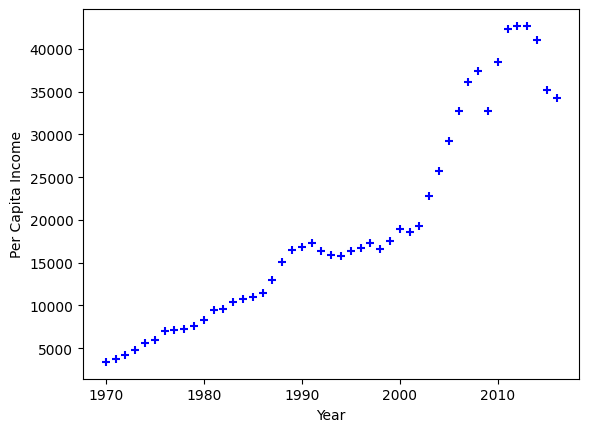

In [ ]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.scatter(df.year,df.income,color='b',marker='+')

In [ ]:
l=linear_model.LinearRegression()
l.fit(df[['year']],df.income)

LinearRegression()

In [ ]:
l.predict([[2024]])

array([44602.55439531])

In [ ]:
l.coef_

array([828.46507522])

In [ ]:
l.intercept_

-1632210.7578554575

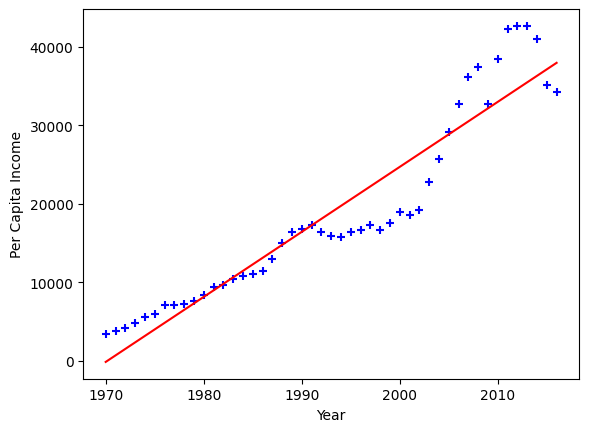

In [ ]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.scatter(df.year,df.income,color='b',marker='+')
plt.plot(df.year,l.predict(df[['year']]),color='red')

# Linear Regression using multiple variables

In [ ]:
df=pd.read_csv('MLDatasets/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df.experience=df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
import math

In [ ]:
m=math.floor((df["test_score(out of 10)"]).mean())
m

7

In [ ]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(m)

In [ ]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
df.experience=df.experience.apply(w2n.word_to_num)

In [ ]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [ ]:
lm=linear_model.LinearRegression()

In [ ]:
lm.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [ ]:
lm.predict([[2,9,6]])

array([53713.86677124])

In [ ]:
lm.predict([[12,10,10]])

array([93747.79628651])

# Saving The Model into a file

In [ ]:
#using Pickle

In [ ]:
import pickle

In [ ]:
with open('linear_model_pickle','wb') as f:
    pickle.dump(lm,f)

In [ ]:
with open('linear_model_pickle','rb') as f:
    model=pickle.load(f)

In [ ]:
model

LinearRegression()

In [ ]:
model.predict([[2,9,6]])

array([53713.86677124])

In [ ]:
#using joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(lm,'linear_model_joblib')

['linear_model_joblib']

In [ ]:
model=joblib.load('linear_model_joblib')

In [ ]:
model

LinearRegression()

In [ ]:
model.predict([[2,9,6]])

array([53713.86677124])

# Dummy variables and One hot encoding

In [ ]:
df=pd.read_csv('MLDatasets/carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
merged=pd.concat([df,pd.get_dummies(df['Car Model'],dtype='int64')] ,axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [ ]:
final=merged.drop(['Car Model','Mercedez Benz C class'],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [ ]:
x=final.drop('Sell Price($)',axis='columns')
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [ ]:
y=final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [ ]:
model=linear_model.LinearRegression()
model.fit(x,y)
model

LinearRegression()

In [ ]:
model.score(x,y)

0.9417050937281082

# Using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
ldf=df
ldf

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
ldf['Car Model']=le.fit_transform(ldf['Car Model'])
ldf

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [ ]:
X=ldf[['Car Model','Mileage','Age(yrs)']]
X

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [ ]:
y=df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.score(X,y)

0.8719970367825953

# Train Test Split

In [ ]:
df=pd.read_csv('MLDatasets/BMWprices.csv')
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


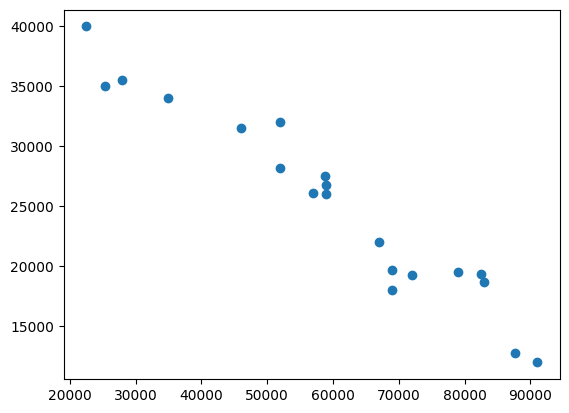

In [ ]:
plt.scatter(df.Mileage,df['Sell Price($)'])

In [ ]:
x=df.drop('Sell Price($)' , axis='columns')
x

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [ ]:
y=df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
len(xtrain)

14

In [ ]:
model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
model.score(xtest,ytest)

0.921242248377633

# Logistic Regression - Binary Classification(0 and 1)

In [ ]:
df=pd.read_csv('MLDatasets/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
left=df[df.left==1]
left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
retained=df[df.left==0]
retained.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [ ]:
left.shape

(3571, 10)

In [ ]:
retained.shape

(11428, 10)

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [ ]:
df.groupby('left')[numeric_columns].mean() #note that groupby works only on numbers so check the DB

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


<Axes: xlabel='salary'>

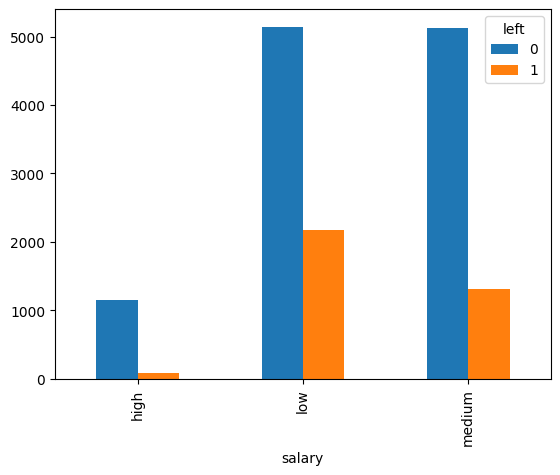

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

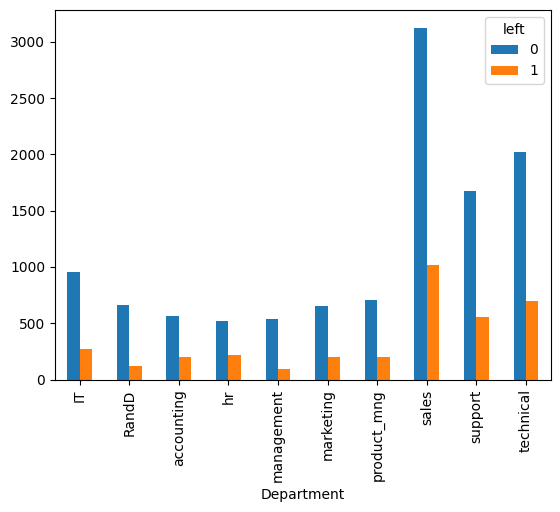

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()
#taking these Four as Independent variables

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [ ]:
salary_dummies=pd.get_dummies(df.salary,prefix='Salary_',dtype='int64')
salary_dummies

,Salary__high,Salary__low,Salary__medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [ ]:
ndf=pd.concat([subdf,salary_dummies],axis='columns')
ndf=ndf.drop(['salary','Salary__medium'],axis='columns')

In [ ]:
ndf

,satisfaction_level,average_montly_hours,promotion_last_5years,Salary__high,Salary__low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [ ]:
y=df.left
len(ndf)==len(y)

True

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(ndf,y,test_size=0.25)

In [ ]:
lg=linear_model.LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
xtrain

,satisfaction_level,average_montly_hours,promotion_last_5years,Salary__high,Salary__low
12189,0.44,156,0,1,0
12948,0.70,231,0,0,0
4134,1.00,216,0,0,1
4266,0.92,197,0,0,0
12466,0.37,134,0,0,0
...,...,...,...,...,...
12780,0.44,271,0,0,1
1464,0.10,279,0,0,0
9021,0.45,179,0,0,1
13570,0.82,162,0,0,0


In [ ]:
ytrain

12189    1
12948    0
4134     0
4266     0
12466    1
        ..
12780    1
1464     1
9021     0
13570    0
12087    1
Name: left, Length: 11249, dtype: int64

In [ ]:
xtest

,satisfaction_level,average_montly_hours,promotion_last_5years,Salary__high,Salary__low
9093,0.90,141,0,0,1
9480,0.56,159,0,0,1
10450,0.59,213,0,0,1
2941,0.67,102,0,0,1
591,0.66,255,0,0,1
...,...,...,...,...,...
2167,0.92,208,0,0,0
2087,0.52,139,0,0,1
10755,0.29,183,0,0,1
3389,0.43,258,0,0,0


In [ ]:
ytest

9093     0
9480     0
10450    0
2941     0
591      1
        ..
2167     0
2087     0
10755    0
3389     0
2392     0
Name: left, Length: 3750, dtype: int64

In [ ]:
lg.score(xtest,ytest)

0.7781333333333333

# Logistic Regression Multiclass Variables

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits=load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]
# the data is represented in the form of 1d array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

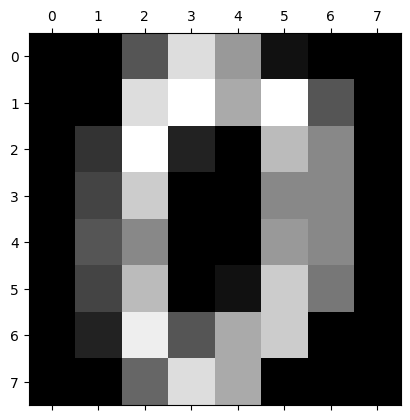

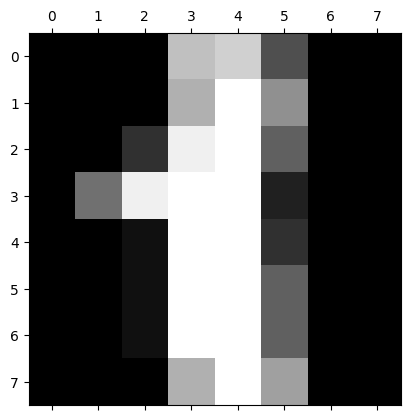

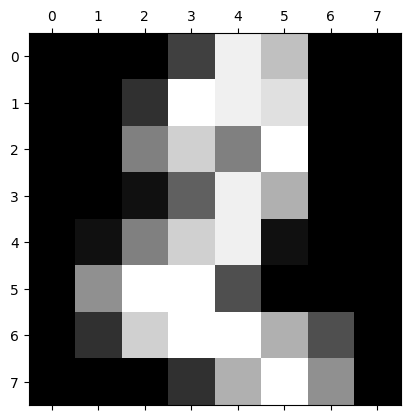

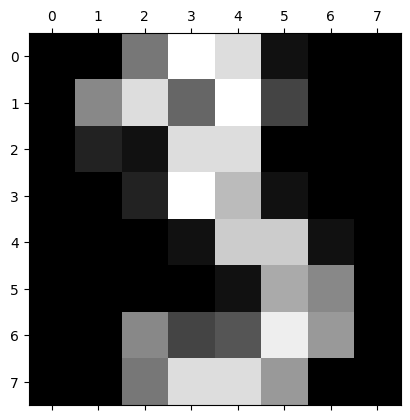

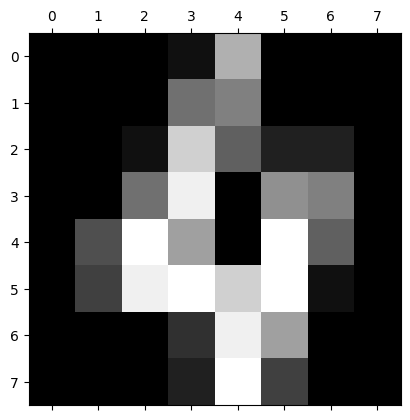

In [ ]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [ ]:
digits.target[0:5] # this will be the y and data will be the x

array([0, 1, 2, 3, 4])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(digits.data,digits.target,test_size=0.2)

In [ ]:
lgn=linear_model.LogisticRegression()
lgn.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
lgn.score(xtest,ytest)

0.9527777777777777

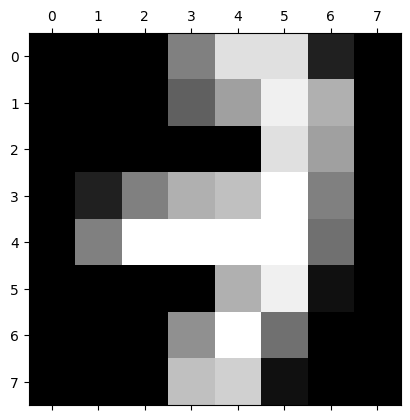

In [ ]:
plt.matshow(digits.images[27])

In [ ]:
lgn.predict([digits.data[27]])

array([7])

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_predicted=lgn.predict(xtest)
cm=confusion_matrix(ytest,y_predicted)
cm

array([[34,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  4],
       [ 0,  1,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  1],
       [ 0,  1,  0,  0,  1,  0,  0,  1, 35,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 33]], dtype=int64)

Text(70.72222222222221, 0.5, 'True Values')

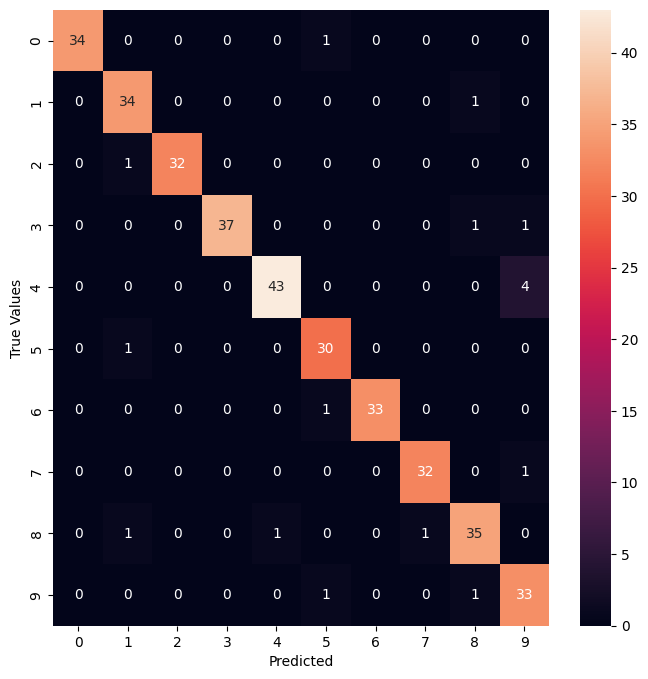

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Values')

# Workout

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.data_module

'sklearn.datasets.data'

In [4]:
iris.filename

'iris.csv'

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
x=iris.data
y=iris.target
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
len(x)==len(y)

True

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

NameError: name 'train_test_split' is not defined

In [ ]:
lgg=linear_model.LogisticRegression()
lgg.fit(xtrain,ytrain)

In [ ]:
lgg.score(xtest,ytest)

In [ ]:
ypredicted=lgg.predict(xtest)
cm=confusion_matrix(ytest,ypredicted)
cm

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel("True Values")

# Decision Tree

In [ ]:
df=pd.read_csv('MLDatasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
x=df[['Pclass','Sex','Age','Fare']]
x.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [ ]:
y=df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
x['Age']=x['Age'].fillna(math.floor(x['Age'].mean()))

In [ ]:
x

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,29.0,23.4500
889,1,male,26.0,30.0000


In [ ]:
x.loc[26]

Pclass        3
Sex        male
Age        29.0
Fare      7.225
Name: 26, dtype: object

In [ ]:
le=LabelEncoder()
x["Sex"]=le.fit_transform(x.Sex)
x.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
dt.score(xtest,ytest)

0.7988826815642458

In [ ]:
ypredicted=dt.predict(xtest)
cm=confusion_matrix(ytest,ypredicted)
cm

array([[97, 20],
       [16, 46]], dtype=int64)

Text(20.72222222222222, 0.5, 'True Vales')

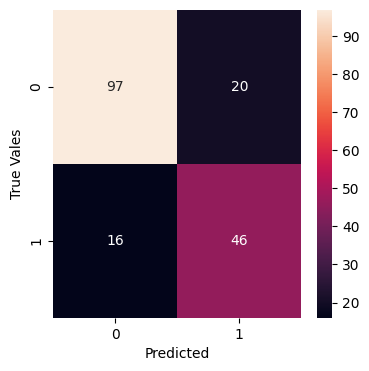

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Vales')

# Support Vector Machine

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df['flower_name']=df['target'].apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

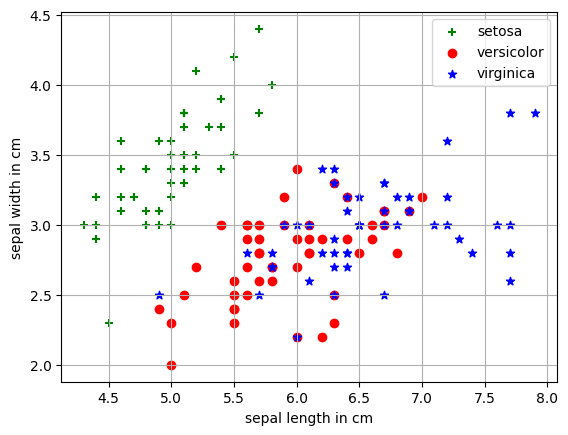

In [ ]:
plt.xlabel('sepal length in cm')
plt.ylabel('sepal width in cm')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='g',marker='+',label='setosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='r',marker='o',label='versicolor')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='b',marker='*',label='virginica')
plt.legend()
plt.grid()

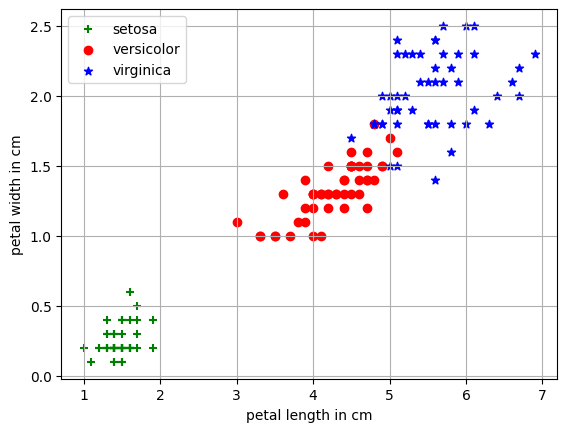

In [ ]:
plt.xlabel('petal length in cm')
plt.ylabel('petal width in cm')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='g',marker='+',label='setosa')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='r',marker='o',label='versicolor')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='b',marker='*',label='virginica')
plt.legend()
plt.grid()

In [ ]:
x=df.drop(['target','flower_name'],axis='columns')
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y=df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [ ]:
len(xtrain)==len(ytrain)

True

In [ ]:
len(xtrain)

120

In [ ]:
from sklearn.svm import SVC
svm=SVC()

In [ ]:
svm.fit(xtrain,ytrain)

SVC()

In [ ]:
svm.score(xtest,ytest)

0.9666666666666667

In [ ]:
svm=SVC(C=20)
svm.fit(xtrain,ytrain)

SVC(C=20)

In [ ]:
#When C(regularization increases score decreases i.e accuracy decreases with increase in regularization)
svm.score(xtest,ytest)

0.9666666666666667

# Workout

In [ ]:
digits=load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

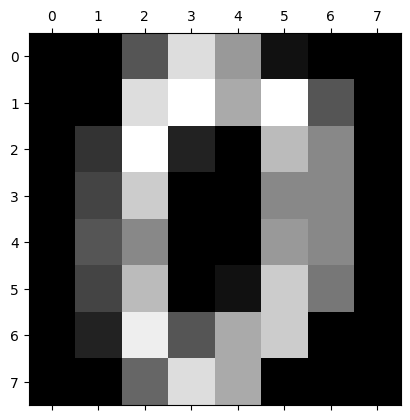

In [ ]:
plt.matshow(digits.images[0])

In [ ]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [ ]:
digits.target_names[:5]

array([0, 1, 2, 3, 4])

In [ ]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [ ]:
x=digits.data
y=digits.target

In [ ]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [ ]:
len(xtrain)

1437

In [ ]:
len(ytrain)

1437

In [ ]:
model=SVC()

In [ ]:
model.fit(xtrain,ytrain)

SVC()

In [ ]:
model.score(xtest,ytest)

0.9833333333333333

In [ ]:
model=SVC(C=1)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9833333333333333

In [ ]:
model=SVC(kernel='linear')
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9861111111111112

# Random Forest

In [ ]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df['target']=digits.target
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [ ]:
x=df.drop('target',axis='columns')
x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
y=df.target
y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
len(xtrain)==len(ytrain)

True

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
rf.score(xtest,ytest)

0.9666666666666667

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)
rf.fit(xtrain,ytrain)
rf.score(xtest,ytest)

0.9694444444444444

In [ ]:
ypredicted=rf.predict(xtest)
cm=confusion_matrix(ytest,ypredicted)
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  2,  1,  1,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 36]], dtype=int64)

Text(70.72222222222221, 0.5, 'True Value')

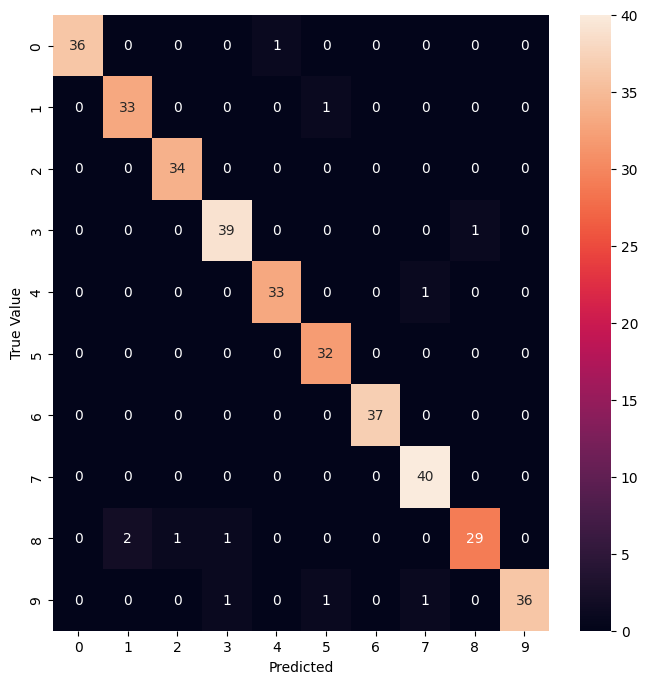

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')

# Exercise

In [ ]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x=pd.DataFrame(iris.data)
x.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y=pd.Series(iris.target)
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
len(xtrain)==len(ytrain)

True

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

0.9666666666666667

In [ ]:
rfc=RandomForestClassifier(n_estimators=500)
rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

1.0

In [ ]:
ypredicted=rfc.predict(xtest)
cm=confusion_matrix(ytest,ypredicted)
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

<Axes: >

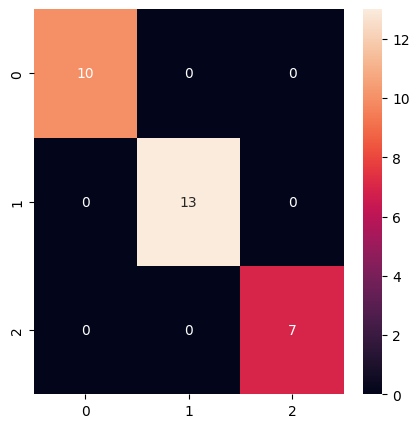

In [ ]:
plt.figure(figsize=(5,5))
plt.xlabel('Predicted')
plt.ylabel('True Values')
sns.heatmap(cm,annot=True)

# K-Fold Cross Validating Different Models

In [ ]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(digits.data,digits.target,test_size=0.25,random_state=10)
len(xtrain)==len(ytrain)

True

In [ ]:
lr=linear_model.LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.9577777777777777

In [ ]:
svm=SVC()
svm.fit(xtrain,ytrain)
svm.score(xtest,ytest)

0.9888888888888889

In [ ]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
rf.score(xtest,ytest)

0.9622222222222222

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for itrain,jtest in kf.split([i for i in range(1,10)]):
    print(itrain,jtest)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
def getscore(model,xtrain,ytrain,xtest,ytest):
    model.fit(xtrain,ytrain)
    return(model.score(xtest,ytest))

In [ ]:
getscore(RandomForestClassifier(),xtrain,ytrain,xtest,ytest)

0.9666666666666667

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
folds=StratifiedKFold(n_splits=5)

In [ ]:
for trainindex,testindex in kf.split(digits.data):
    xtrain,xtest,ytrain,ytest=digits.data[trainindex],digits.data[testindex],digits.target[trainindex],digits.target[testindex]
    print('Random Forest:',getscore(RandomForestClassifier(),xtrain,ytrain,xtest,ytest))
    print('SVM:',getscore(SVC(),xtrain,ytrain,xtest,ytest))
    print('Logistic Regression:',getscore(linear_model.LogisticRegression(),xtrain,ytrain,xtest,ytest))

Random Forest: 0.9382303839732888
SVM: 0.9666110183639399
Logistic Regression: 0.9232053422370617
Random Forest: 0.9532554257095158
SVM: 0.9816360601001669
Logistic Regression: 0.9415692821368948
Random Forest: 0.9315525876460768
SVM: 0.9549248747913188
Logistic Regression: 0.9148580968280468


In [ ]:
logistic_scores=[]
SVM_scores=[]
RF_scores=[]
for trainindex,testindex in kf.split(digits.data):
    xtrain,xtest,ytrain,ytest=digits.data[trainindex],digits.data[testindex],digits.target[trainindex],digits.target[testindex]
    RF_scores.append(getscore(RandomForestClassifier(),xtrain,ytrain,xtest,ytest))
    SVM_scores.append(getscore(SVC(),xtrain,ytrain,xtest,ytest))
    logistic_scores.append(getscore(linear_model.LogisticRegression(),xtrain,ytrain,xtest,ytest))

In [ ]:
logistic_scores

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [ ]:
SVM_scores

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [ ]:
RF_scores

[0.9415692821368948, 0.9515859766277128, 0.9348914858096828]

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LogisticRegression(),digits.data,digits.target)

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [ ]:
cross_val_score(SVC(),digits.data,digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [ ]:
cross_val_score(RandomForestClassifier(),digits.data,digits.target)

array([0.93611111, 0.91111111, 0.9637883 , 0.96935933, 0.91643454])

# K-Means Clustering

In [ ]:
df=pd.read_csv('MLDatasets/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


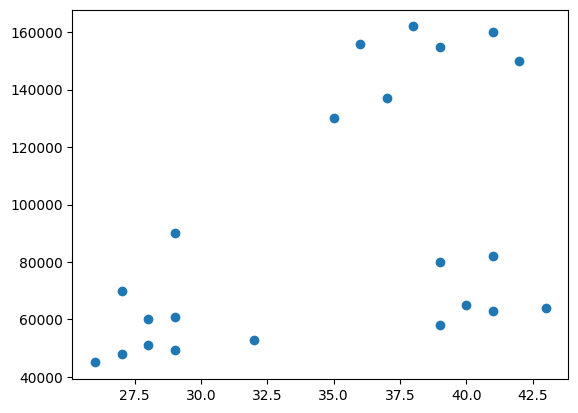

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km=KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [ ]:
ypredicted=km.fit_predict(df[['Age','Income($)']])
ypredicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 2, 2, 0])

In [ ]:
df['Cluster']=ypredicted
df

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


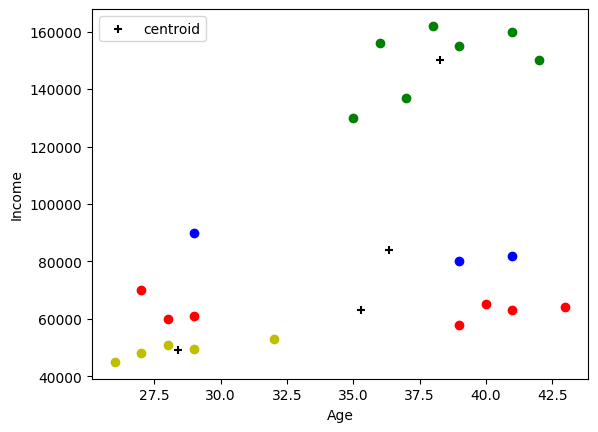

In [ ]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]
plt.scatter(df1.Age,df1['Income($)'],color='r')
plt.scatter(df2.Age,df2['Income($)'],color='g')
plt.scatter(df3.Age,df3['Income($)'],color='b')
plt.scatter(df4.Age,df4['Income($)'],color='y')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='+',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

the datas arent properly grouped using MinMaxScaler we can avoid that

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),Cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [ ]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [ ]:
km=KMeans(n_clusters=4)
df['Cluster']=km.fit_predict(df[['Age','Income($)']])
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,3
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,3
3,Ismail,0.117647,0.128205,3
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [ ]:
km.cluster_centers_
#the four centroids and their X and Y coordinates

array([[0.26470588, 0.22649573],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ],
       [0.10084034, 0.08485958]])

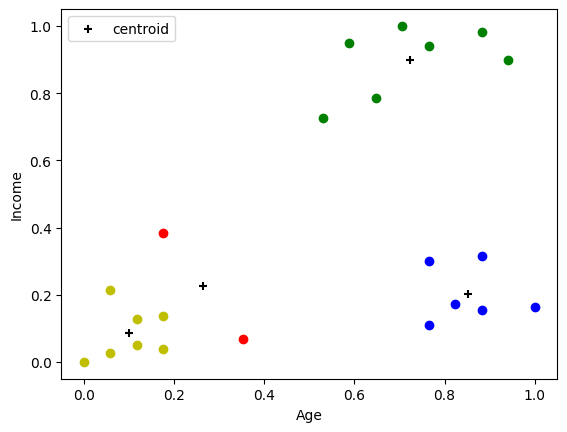

In [ ]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]
plt.scatter(df1.Age,df1['Income($)'],color='r')
plt.scatter(df2.Age,df2['Income($)'],color='g')
plt.scatter(df3.Age,df3['Income($)'],color='b')
plt.scatter(df4.Age,df4['Income($)'],color='y')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='+',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [ ]:
sse=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [ ]:
sse

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.368773407644059,
 0.3631700554749754,
 0.25014078658109806,
 0.17985515357088427,
 0.18059938004929582,
 0.11377044584834492]

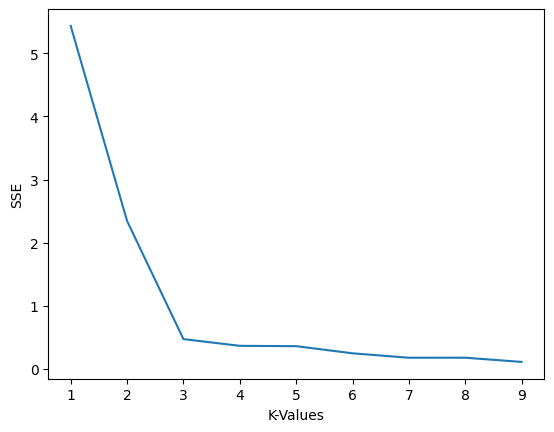

In [ ]:
plt.xlabel('K-Values')
plt.ylabel('SSE')
kvalues= [i for i in range(1,10)]
plt.plot(kvalues,sse)

We can see that 3 is the perfect value for k from the Elbow diagram

# Exercise

In [ ]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)


In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])
df

,petal length (cm),petal width (cm),target
0,0.067797,0.2,0
1,0.067797,0.2,0
2,0.050847,0.2,0
3,0.084746,0.2,0
4,0.067797,0.2,0
...,...,...,...
145,0.711864,2.3,2
146,0.677966,1.9,2
147,0.711864,2.0,2
148,0.745763,2.3,2


In [ ]:
scaler=MinMaxScaler()
df['petal width (cm)']=scaler.fit_transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm),target
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [ ]:
km=KMeans(n_clusters=3)
df['Cluster']=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df.drop('target', axis='columns',inplace=True)
df

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [ ]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

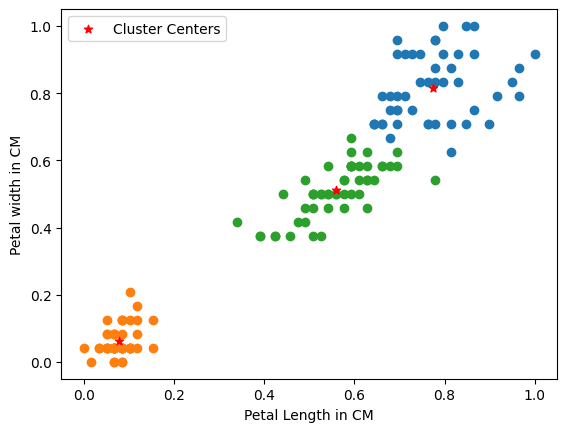

In [ ]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'])
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='r',marker='*',label='Cluster Centers')
plt.xlabel('Petal Length in CM')
plt.ylabel('Petal width in CM')
plt.legend()

In [ ]:
kvalues=[i for i in range(1,10)]
sse=[]
for k in kvalues:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)
sse

[28.368353219727194,
 5.176463590044368,
 1.7018746881920963,
 1.1826653136050633,
 1.0889817322803683,
 0.6801035704886195,
 0.5673451458363141,
 0.49774063859426165,
 0.5330738908905428]

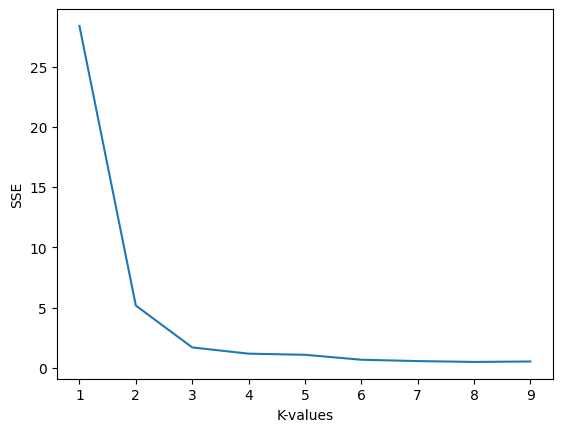

In [ ]:
plt.xlabel('K-values')
plt.ylabel('SSE')
plt.plot(kvalues,sse)

from here also we can see that 3 is the perfect number for the clusters

# Naive Bayes-1

In [ ]:
df=pd.read_csv('MLDatasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df=df[['Pclass','Sex','Age','Fare','Survived']]
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [ ]:
inputs=df.drop('Survived',axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [ ]:
target=df.Survived
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
inputs=pd.concat([inputs,pd.get_dummies(inputs.Sex,dtype='int64')],axis='columns')

In [ ]:
inputs.drop('Sex',axis='columns',inplace=True)

In [ ]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
inputs.isna().any()

Pclass    False
Age        True
Fare      False
female    False
male      False
dtype: bool

In [ ]:
inputs.Age=inputs.Age.fillna(math.floor(inputs.Age.mean()))
inputs

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,29.0,23.4500,1,0
889,1,26.0,30.0000,0,1


In [ ]:
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [ ]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(inputs,target,test_size=0.25)
len(xtrain)==len(ytrain)

True

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [ ]:
nb.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
nb.score(xtest,ytest)

0.7982062780269058

# Naive Bayes Spam Detection Project

In [ ]:
df=pd.read_csv('MLDatasets/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
df['Spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
x=v.fit_transform(df.Message)
x=x.toarray()

In [ ]:
y=df.Spam
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Spam, Length: 5572, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)
xtrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
len(xtrain)==len(ytrain)

True

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()

In [ ]:
mn.fit(xtrain,ytrain)

MultinomialNB()

In [ ]:
mn.score(xtest,ytest)

0.9820531227566404

In [ ]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails=v.transform(emails)
mn.predict(emails)

array([0, 1], dtype=int64)

# PipeLining Method

In [ ]:
from sklearn.pipeline import Pipeline
clf=Pipeline([('vectorizer',CountVectorizer()),('nb',MultinomialNB())])

In [ ]:
clf.fit(df.Message,df.Spam)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
clf.predict(emails)

array([0, 1], dtype=int64)

# Exercise

In [ ]:
from sklearn.datasets import load_wine
wine=load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
wine.data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
target=pd.Series(wine.target,name='Target')

In [ ]:
target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Target, Length: 178, dtype: int32

In [ ]:
df=pd.concat([df,target],axis='columns')

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.Target[100:175]

100    1
101    1
102    1
103    1
104    1
      ..
170    2
171    2
172    2
173    2
174    2
Name: Target, Length: 75, dtype: int32

In [ ]:
df['Class_names']=df['Target'].apply(lambda x:wine.target_names[x])

In [ ]:
#this is the perfect dataset
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target,Class_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [ ]:
x=df.drop(['Target','Class_names'],axis='columns')
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y=df.Target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [ ]:
x.isna().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)
len(xtrain)==len(ytrain)

True

In [ ]:
nb=GaussianNB()
nb.fit(xtrain,ytrain)
nb.score(xtest,ytest)

0.9777777777777777

In [ ]:
m=MultinomialNB()
m.fit(xtrain,ytrain)
m.score(xtest,ytest)

0.9111111111111111

# Hyper Parameter Tuning

In [ ]:
iris=load_iris()

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower']=iris.target
df['flower_names']=df['flower'].apply(lambda x :iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(iris.data,iris.target,test_size=0.2)
len(xtrain)==len(ytrain)

True

In [ ]:
model=SVC(kernel='rbf',C=30,gamma='auto')
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9

In [ ]:
cross_val_score(SVC(kernel='rbf',C=10,gamma='auto'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
cross_val_score(SVC(kernel='linear',C=10,gamma='auto'),iris.data,iris.target,cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [ ]:
cross_val_score(SVC(kernel='rbf',C=20,gamma='auto'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [ ]:
kernals=['rbf','linear']
C=[1,10,20]
avg={}
for k in kernals:
    for c in C:
        cvscores=cross_val_score(SVC(kernel=k,C=c,gamma='auto'),iris.data,iris.target,cv=5)
        avg[k+'_'+str(c)]=np.average(cvscores)
avg

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False)
clf.fit(iris.data,iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00099773, 0.00059824, 0.00134783, 0.00131898, 0.00079675,
        0.00078807]),
 'std_fit_time': array([8.84401178e-07, 4.88460855e-04, 4.34487530e-04, 4.36581004e-04,
        3.98375213e-04, 3.96201857e-04]),
 'mean_score_time': array([0.0010222 , 0.00039892, 0.00100536, 0.00080419, 0.00059953,
        0.00075126]),
 'std_score_time': array([4.89490472e-05, 4.88577633e-04, 1.44012716e-05, 4.02306242e-04,
        4.89512898e-04, 3.91788486e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [ ]:
results=pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000998,8.844012e-07,0.001022,0.000049,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000598,4.884609e-04,0.000399,0.000489,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001348,4.344875e-04,0.001005,0.000014,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001319,4.365810e-04,0.000804,0.000402,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000797,3.983752e-04,0.000600,0.000490,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000788,3.962019e-04,0.000751,0.000392,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [ ]:
results[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [ ]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

In [ ]:
clf.best_score_

0.9800000000000001

In [ ]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,
return_train_score=False,
n_iter=2)
rs.fit(iris.data,iris.target)
rs.cv_results_

{'mean_fit_time': array([0.0027422 , 0.00299239]),
 'std_fit_time': array([0.00500045, 0.00399053]),
 'mean_score_time': array([0.00040059, 0.00119691]),
 'std_score_time': array([0.00049063, 0.00039873]),
 'param_kernel': masked_array(data=['rbf', 'linear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[10, 20],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf', 'C': 10}, {'kernel': 'linear', 'C': 20}],
 'split0_test_score': array([0.96666667, 1.        ]),
 'split1_test_score': array([1., 1.]),
 'split2_test_score': array([0.96666667, 0.9       ]),
 'split3_test_score': array([0.96666667, 0.93333333]),
 'split4_test_score': array([1., 1.]),
 'mean_test_score': array([0.98      , 0.96666667]),
 'std_test_score': array([0.01632993, 0.0421637 ]),
 'rank_test_score': array([1, 2])}

In [ ]:
rsresults=pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]
rsresults

,param_C,param_kernel,mean_test_score
0,10,rbf,0.980000
1,20,linear,0.966667


# Choosing best model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_params={
    'SVM':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'Random_Forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50,100]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }

}

In [ ]:
scores=[]

for modelname,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(iris.data,iris.target)
    scores.append({
        'model':modelname,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })


In [ ]:
scores

[{'model': 'SVM',
  'best_score': 0.9800000000000001,
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'model': 'Random_Forest',
  'best_score': 0.9600000000000002,
  'best_params': {'n_estimators': 100}},
 {'model': 'logistic_regression',
  'best_score': 0.9666666666666668,
  'best_params': {'C': 5}}]

In [ ]:
df_scores=pd.DataFrame(scores)
df_scores

,model,best_score,best_params
0,SVM,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,Random_Forest,0.960000,{'n_estimators': 100}
2,logistic_regression,0.966667,{'C': 5}


# exercise

In [ ]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],

        }
    }
}

In [ ]:
model_params.items()

dict_items([('svm', {'model': SVC(gamma='auto'), 'params': {'C': [1, 10, 20], 'kernel': ['rbf', 'linear']}}), ('random_forest', {'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 5, 10]}}), ('logistic_regression', {'model': LogisticRegression(solver='liblinear'), 'params': {'C': [1, 5, 10]}}), ('naive_bayes_gaussian', {'model': GaussianNB(), 'params': {}}), ('naive_bayes_multinomial', {'model': MultinomialNB(), 'params': {}}), ('decision_tree', {'model': DecisionTreeClassifier(), 'params': {'criterion': ['gini', 'entropy']}})])

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.903748,{'n_estimators': 10}
2,logistic_regression,0.922114,{'C': 1}
3,naive_bayes_gaussian,0.806928,{}
4,naive_bayes_multinomial,0.870350,{}
5,decision_tree,0.806366,{'criterion': 'entropy'}


# L1 And L2 Regularization

In [ ]:
dataset=pd.read_csv('MLDatasets/Melbourne_housing_FULL.csv')
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
cols=['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset=dataset[cols]
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [ ]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [ ]:
zerocols=['Propertycount','Distance','Bedroom2','Bathroom','Car']
dataset[zerocols]=dataset[zerocols].fillna(0)
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [ ]:
dataset['Landsize']=dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea']=dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [ ]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [ ]:
dataset=pd.get_dummies(dataset,drop_first=True,dtype='int64')
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x=dataset.drop('Price',axis='columns')
y=dataset['Price']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)
len(xtrain)==len(ytrain)

True

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(xtrain,ytrain)
reg.score(xtest,ytest)

-134434114772.64616

In [ ]:
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(xtrain,ytrain)
lasso_reg.score(xtest,ytest)

0.6736819213308463

In [ ]:
ridge_reg=linear_model.Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(xtrain,ytrain)
ridge_reg.score(xtest,ytest)

0.661856600634535

# KNN Classification

In [ ]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['target_names']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

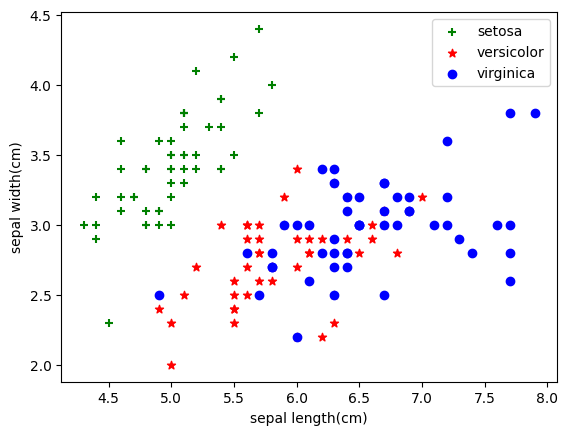

In [ ]:
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='+',color='g',label='setosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*',color='r',label='versicolor')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker='o',color='b',label='virginica')
plt.legend()

In [ ]:
x=df.drop(['target','target_names'],axis=1)
y=df.target

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
len(xtrain)==len(ytrain)

True

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(xtest,ytest)

1.0

Text(0.5, 58.7222222222222, 'predicted values')

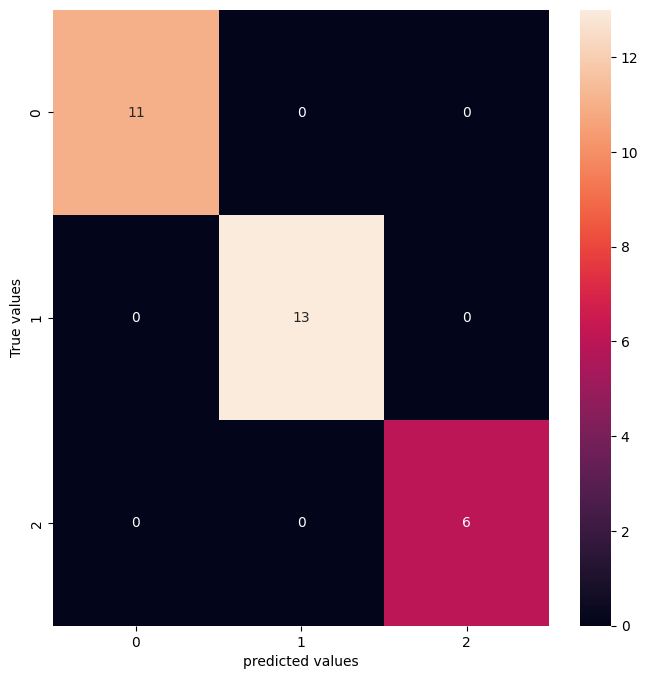

In [ ]:
ypredicted=knn.predict(xtest)
cm=confusion_matrix(ytest,ypredicted)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.ylabel('True values')
plt.xlabel('predicted values')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypredicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Principal Component Analysis(PCA)

In [ ]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

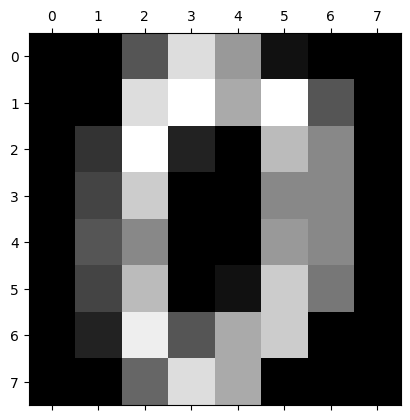

In [ ]:
plt.gray()
plt.matshow(digits.data[0].reshape(8,8))

In [ ]:
df=pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
x=df
y=digits.target

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaledx=scaler.fit_transform(x)
scaledx

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(scaledx,y,test_size=0.2,random_state=10)
len(xtrain)==len(ytrain)

True

In [ ]:
model=LogisticRegression().fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9694444444444444

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
xpca=pca.fit_transform(x)
xpca.shape

(1797, 29)

In [ ]:
xpca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [ ]:
pca.n_components_

29

In [ ]:
pca.n_components

0.95

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(xpca,y,test_size=0.2,random_state=10)
model=LogisticRegression(max_iter=1000).fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9388888888888889

# Bias and Variance

variance occurs due to the overfitting of the model. The test error is very low in overfitting. But there will be a huge difference in test error in various training datas . The variance in the test error must be low for any training datas

Bias occurs due to underfitting of the model. The train error is ery high in this case . the accuracy of the model is very low in this cases. The high training error would cause high bias.

The model should be in a way that the variance as well as the bias is very low

# Ensemble Learning Bagging

In [ ]:
df=pd.read_csv('MLDatasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
scaler=StandardScaler()
scaledx=scaler.fit_transform(x)
scaledx[:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(scaledx,y,test_size=0.2,random_state=10,stratify=y)

In [ ]:
len(xtrain)==len(ytrain)

True

In [ ]:
scores=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
scores

array([0.65584416, 0.66883117, 0.7012987 , 0.77124183, 0.71895425])

In [ ]:
scores.mean()

0.7032340208810798

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_model=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(xtrain,ytrain)
bag_model.oob_score_

0.760586319218241

In [ ]:
bag_model.score(xtest,ytest)

0.8051948051948052

In [ ]:
scores=cross_val_score(bag_model,x,y,cv=5)
scores.mean()

0.7578728461081402

In [ ]:
# checking using randomforestclasssifier

scores=cross_val_score(RandomForestClassifier(),x,y,cv=5)
scores.mean()

0.768270944741533

# Exercise

In [ ]:
df=pd.read_csv('MLDatasets/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df['Sex']=le.fit_transform(df.Sex)
df['ChestPainType']=le.fit_transform(df.ChestPainType)
df['RestingECG']=le.fit_transform(df.RestingECG)
df['ExerciseAngina']=le.fit_transform(df.ExerciseAngina)
df['ST_Slope']=le.fit_transform(df.ST_Slope)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
x=df.drop('HeartDisease',axis=1)
y=df.HeartDisease
len(x)==len(y)

True

In [ ]:
scaler=StandardScaler()
scaledx=scaler.fit_transform(x)
scaledx[:5]

array([[-1.4331398 ,  0.51595242,  0.22903206,  0.41090889,  0.82507026,
        -0.55134134,  0.01725451,  1.38292822, -0.8235563 , -0.83243239,
         1.05211381],
       [-0.47848359, -1.93816322,  1.27505906,  1.49175234, -0.17196105,
        -0.55134134,  0.01725451,  0.75415714, -0.8235563 ,  0.10566353,
        -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, -0.12951283,  0.7701878 ,
        -0.55134134,  1.60121899, -1.52513802, -0.8235563 , -0.83243239,
         1.05211381],
       [-0.5845565 , -1.93816322, -0.81699495,  0.30282455,  0.13903954,
        -0.55134134,  0.01725451, -1.13215609,  1.21424608,  0.57471149,
        -0.59607813],
       [ 0.05188098,  0.51595242,  1.27505906,  0.95133062, -0.0347549 ,
        -0.55134134,  0.01725451, -0.5819814 , -0.8235563 , -0.83243239,
         1.05211381]])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(scaledx,y,stratify=y,test_size=0.25,random_state=10)
len(xtrain)==len(ytrain)

True

 # Checking SVC model

In [ ]:
scores=cross_val_score(SVC(),scaledx,y,cv=5)
scores.mean()

0.8256296032311713

In [ ]:
bag_model=BaggingClassifier(
    estimator=SVC(gamma='auto'),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
scores=cross_val_score(bag_model,scaledx,y,cv=5)
scores.mean()

0.8256414825374196

# Checking DecisionTreeClassifier Model

In [ ]:
scores=cross_val_score(DecisionTreeClassifier(),scaledx,y,cv=5)
scores.mean()

0.7363209788548348

In [ ]:
bag_model=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
scores=cross_val_score(bag_model,scaledx,y,cv=5)
scores.mean()

0.8038548348776432

# Handling Imbalanced Data using different methods

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Datasets/loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

<Axes: xlabel='loan_status'>

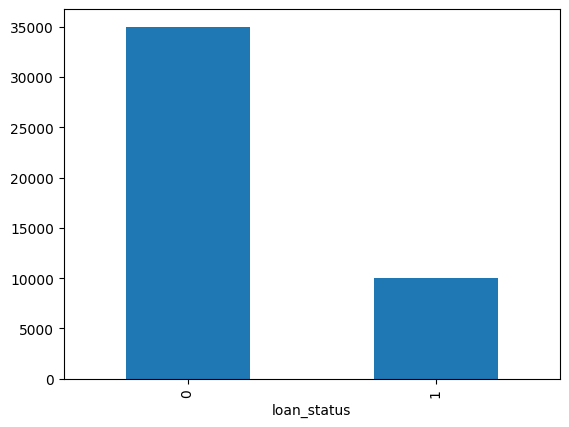

In [ ]:
data.loan_status.value_counts().plot(kind = 'bar')

In [ ]:
data.loan_status.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

The data is clearly underfitting we have to balance the data before using it

In [ ]:
data.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [ ]:
data.dtypes[data.dtypes == 'object'].index

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
string_columns = data.dtypes[data.dtypes == 'object'].index

In [ ]:
string_columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
data.person_gender.value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [ ]:
data.person_gender.replace({'male': 0, 'female' : 1}, inplace = True)
data.person_gender.value_counts()

C:\Users\star\AppData\Local\Temp\ipykernel_18892\1465427308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.person_gender.replace({'male': 0, 'female' : 1}, inplace = True)
C:\Users\star\AppData\Local\Temp\ipykernel_18892\1465427308.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.p

person_gender
0    24841
1    20159
Name: count, dtype: int64

In [ ]:
string_columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
data.person_education.value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
edu_le = LabelEncoder().fit(data.person_education)
data['person_education'] = edu_le.transform(data.person_education)
data.person_education.value_counts()

person_education
1    13399
0    12028
3    11972
4     6980
2      621
Name: count, dtype: int64

In [ ]:
string_columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
data.person_home_ownership.value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [ ]:
ownership_le = LabelEncoder()
data['person_home_ownership'] = ownership_le.fit_transform(data.person_home_ownership)
data.person_home_ownership.value_counts()

person_home_ownership
3    23443
0    18489
2     2951
1      117
Name: count, dtype: int64

In [ ]:
string_columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
data.loan_intent.value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [ ]:
intent_le = LabelEncoder()
data['loan_intent'] = intent_le.fit_transform(data.loan_intent)
data.loan_intent.value_counts()

loan_intent
1    9153
3    8548
5    7819
4    7552
0    7145
2    4783
Name: count, dtype: int64

In [ ]:
string_columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
data.previous_loan_defaults_on_file.value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

In [ ]:
data.previous_loan_defaults_on_file.replace({'Yes' : 1, 'No' : 0}, inplace = True)
data.previous_loan_defaults_on_file.value_counts()

C:\Users\star\AppData\Local\Temp\ipykernel_18892\931885658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.previous_loan_defaults_on_file.replace({'Yes' : 1, 'No' : 0}, inplace = True)
C:\Users\star\AppData\Local\Temp\ipykernel_18892\931885658.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

previous_loan_defaults_on_file
1    22858
0    22142
Name: count, dtype: int64

In [ ]:
data.dtypes

person_age                        float64
person_gender                       int64
person_education                    int32
person_income                     float64
person_emp_exp                      int64
person_home_ownership               int32
loan_amnt                         float64
loan_intent                         int32
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int64
loan_status                         int64
dtype: object

In [ ]:
data.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


**There are no null values in this dataset**

In [ ]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,1,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,1,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,1,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,1,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,0,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalable_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                    'cb_person_cred_hist_length', 'credit_score']
scalable_columns

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [ ]:
scaler = MinMaxScaler().fit(data[scalable_columns])
scaler

MinMaxScaler()

In [ ]:
data[scalable_columns] = scaler.transform(data[scalable_columns])
data[scalable_columns]

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,0.016129,0.008891,0.000,1.000000,0.727023,0.742424,0.035714,0.371739
1,0.008065,0.000595,0.000,0.014493,0.392318,0.121212,0.000000,0.247826
2,0.040323,0.000617,0.024,0.144928,0.510974,0.666667,0.035714,0.532609
3,0.024194,0.009976,0.000,1.000000,0.672840,0.666667,0.000000,0.619565
4,0.032258,0.008082,0.008,1.000000,0.606996,0.803030,0.071429,0.426087
...,...,...,...,...,...,...,...,...
44995,0.056452,0.005557,0.048,0.420290,0.702332,0.469697,0.035714,0.554348
44996,0.137097,0.008036,0.136,0.246377,0.593278,0.212121,0.321429,0.502174
44997,0.104839,0.006804,0.056,0.065826,0.315501,0.075758,0.285714,0.604348
44998,0.072581,0.003499,0.032,0.333333,0.535665,0.545455,0.142857,0.465217


In [ ]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,0.016129,1,4,0.008891,0.000,3,1.000000,4,0.727023,0.742424,0.035714,0.371739,0,1
1,0.008065,1,3,0.000595,0.000,2,0.014493,1,0.392318,0.121212,0.000000,0.247826,1,0
2,0.040323,1,3,0.000617,0.024,0,0.144928,3,0.510974,0.666667,0.035714,0.532609,0,1
3,0.024194,1,1,0.009976,0.000,3,1.000000,3,0.672840,0.666667,0.000000,0.619565,0,1
4,0.032258,0,4,0.008082,0.008,3,1.000000,3,0.606996,0.803030,0.071429,0.426087,0,1


In [ ]:
data.dtypes

person_age                        float64
person_gender                       int64
person_education                    int32
person_income                     float64
person_emp_exp                    float64
person_home_ownership               int32
loan_amnt                         float64
loan_intent                         int32
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                      float64
previous_loan_defaults_on_file      int64
loan_status                         int64
dtype: object

In [ ]:
x = data.drop('loan_status', axis = 1)
y = data.loan_status
x.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,0.016129,1,4,0.008891,0.000,3,1.000000,4,0.727023,0.742424,0.035714,0.371739,0
1,0.008065,1,3,0.000595,0.000,2,0.014493,1,0.392318,0.121212,0.000000,0.247826,1
2,0.040323,1,3,0.000617,0.024,0,0.144928,3,0.510974,0.666667,0.035714,0.532609,0
3,0.024194,1,1,0.009976,0.000,3,1.000000,3,0.672840,0.666667,0.000000,0.619565,0
4,0.032258,0,4,0.008082,0.008,3,1.000000,3,0.606996,0.803030,0.071429,0.426087,0


In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

In [ ]:
model = LogisticRegression().fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8911111111111111

In [ ]:
model.score(xtrain, ytrain)

0.8910555555555556

In [ ]:
model = DecisionTreeClassifier().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.8947777777777778, 1.0)

In [ ]:
model = RandomForestClassifier().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.9256666666666666, 1.0)

In [ ]:
model = LinearSVC().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.892, 0.8910555555555556)

**On *uneven data* the models perform with a accuracy around 90 percent. we will check the accuracy by balancing the data**

In [ ]:
data.loan_status.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

## Undersampling the Majority Data

In [ ]:
class_0_count, class_1_count = data.loan_status.value_counts()
class_0_count, class_1_count

(35000, 10000)

In [ ]:
df_class_0 = data[data.loan_status == 0]
df_class_1 = data[data.loan_status == 1]
len(df_class_0), len(df_class_1)

(35000, 10000)

In [ ]:
under_df_class_0 = df_class_0.sample(class_1_count)
under_df_class_1 = df_class_1
len(under_df_class_0), len(under_df_class_1)

(10000, 10000)

In [ ]:
under_df = pd.concat([under_df_class_0, under_df_class_1], axis = 0)
under_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
7937,0.048387,0,1,0.007334,0.024,3,0.188406,4,0.383402,0.181818,0.071429,0.667391,0,0
14585,0.032258,1,3,0.017425,0.016,0,0.368116,1,0.676269,0.151515,0.035714,0.393478,1,0
28584,0.072581,1,0,0.005725,0.072,0,0.130435,4,0.107682,0.151515,0.178571,0.550000,1,0
41423,0.024194,0,0,0.007395,0.000,3,0.159420,4,0.521948,0.151515,0.071429,0.610870,1,0
2284,0.032258,1,0,0.006834,0.032,3,0.362319,5,0.383402,0.348485,0.000000,0.219565,1,0


In [ ]:
under_df.loan_status.value_counts()

loan_status
0    10000
1    10000
Name: count, dtype: int64

In [ ]:
x = under_df.drop('loan_status', axis = 1)
y = under_df.loan_status
x.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
7937,0.048387,0,1,0.007334,0.024,3,0.188406,4,0.383402,0.181818,0.071429,0.667391,0
14585,0.032258,1,3,0.017425,0.016,0,0.368116,1,0.676269,0.151515,0.035714,0.393478,1
28584,0.072581,1,0,0.005725,0.072,0,0.130435,4,0.107682,0.151515,0.178571,0.550000,1
41423,0.024194,0,0,0.007395,0.000,3,0.159420,4,0.521948,0.151515,0.071429,0.610870,1
2284,0.032258,1,0,0.006834,0.032,3,0.362319,5,0.383402,0.348485,0.000000,0.219565,1


In [ ]:
y.head()

7937     0
14585    0
28584    0
41423    0
2284     0
Name: loan_status, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, stratify=y, random_state=10)
xtrain.shape, xtest.shape

((16000, 13), (4000, 13))

In [ ]:
ytrain.value_counts()

loan_status
0    8000
1    8000
Name: count, dtype: int64

In [ ]:
ytest.value_counts()

loan_status
0    2000
1    2000
Name: count, dtype: int64

## Evaluating the models on the balanced data

In [ ]:
model = LogisticRegression().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.87075, 0.8741875)

In [ ]:
model = DecisionTreeClassifier().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.871, 1.0)

In [ ]:
model = RandomForestClassifier().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.9005, 1.0)

In [ ]:
model = LinearSVC().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.87075, 0.873875)

## Oversampling the minority Class

In [ ]:
class_0_count, class_1_count

(35000, 10000)

In [ ]:
df_class_0.shape, df_class_1.shape

((35000, 14), (10000, 14))

In [ ]:
class_0_over = df_class_0
class_1_over = df_class_1.sample(class_0_count,replace = True)
class_0_over.shape, class_1_over.shape

((35000, 14), (35000, 14))

In [ ]:
over_df = pd.concat([class_0_over, class_1_over], axis = 0)
over_df.shape

(70000, 14)

In [ ]:
x = over_df.drop('loan_status', axis = 1)
y = over_df.loan_status

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, stratify=y, random_state=10)
ytrain.value_counts(), ytest.value_counts()

(loan_status
 0    28000
 1    28000
 Name: count, dtype: int64,
 loan_status
 0    7000
 1    7000
 Name: count, dtype: int64)

## Training and Evaluating the model on Oversampled Data

In [ ]:
model = LogisticRegression().fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8712857142857143

In [ ]:
model = RandomForestClassifier().fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9709285714285715

In [ ]:
model = DecisionTreeClassifier().fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9567857142857142

In [ ]:
model = LinearSVC().fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8709285714285714

In [ ]:
model = RandomForestClassifier().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.9705, 1.0)

In [ ]:
model = DecisionTreeClassifier().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.9567857142857142, 1.0)

In [ ]:
model = SVC().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.8742857142857143, 0.8766964285714286)

**The RandomForest and DecisionTree Algorithms works better on the `Oversampled Data`**

## Trying Data Duplication using SMOTE Method and Evaluating the Results with the Above results

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x = data.drop('loan_status', axis = 1)
y = data.loan_status
y.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy='minority')
smoted_x, smoted_y = smote.fit_resample(x, y)
smoted_y.value_counts()

loan_status
1    35000
0    35000
Name: count, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(smoted_x, smoted_y, test_size=0.2, stratify=smoted_y, random_state=10)
ytrain.value_counts(), ytest.value_counts()

(loan_status
 0    28000
 1    28000
 Name: count, dtype: int64,
 loan_status
 0    7000
 1    7000
 Name: count, dtype: int64)

In [ ]:
model = LogisticRegression().fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8802142857142857

In [ ]:
model = DecisionTreeClassifier().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.9008571428571429, 1.0)

In [ ]:
model = RandomForestClassifier().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.9442857142857143, 1.0)

In [ ]:
model = LinearSVC().fit(xtrain, ytrain)
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.8792857142857143, 0.8816607142857142)

## Hyper parameter Tuning

**So far `DecisionTreeClassifier` and `RandomForestClassifier` algorithms have good accuracy than other Models. so we will tune those Models and check the results**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'DecisionTreeClassifier': {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ["gini", "entropy", "log_loss"],
            'max_depth' : [i for i in range(1,11)]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50,100],
            'criterion' : ["gini", "entropy", "log_loss"],
            'max_depth' : [i for i in range(1,11)]
        }
    }
}

In [ ]:
scores=[]

for modelname,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model':modelname,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })


In [ ]:
pd.DataFrame(scores)

,model,best_score,best_params
0,DecisionTreeClassifier,0.915489,"{'criterion': 'gini', 'max_depth': 10}"
1,RandomForestClassifier,0.919000,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
